In [20]:
import networkx as nx # need networkx >= 2.5
import osmnx as ox
import contextily as ctx 
from matplotlib import pyplot as plt
from shapely.geometry import Polygon
import folium
import numpy as np
import matplotlib.patches as mpatches
import geopandas as gpd
from shapely.ops import nearest_points
import pandas as pd

In [3]:
place = "Venice, Italy"
venice = ox.graph_from_place(place, network_type='all')

In [4]:
place_footprint = ox.geocode_to_gdf(place)
venice_shape = place_footprint.to_crs('epsg:3857')
venice_shape

,geometry,bbox_north,bbox_south,bbox_east,bbox_west,place_id,osm_type,osm_id,lat,lon,class,type,place_rank,importance,addresstype,name,display_name
0,"POLYGON ((1354405.866 5700563.436, 1354423.343...",45.577998,45.231247,12.596571,12.166835,98704645,relation,44741,45.437191,12.33459,boundary,administrative,16,0.711019,city,Venice,"Venice, Venezia, Veneto, 30121-30176, Italy"


In [5]:
!pip install folium matplotlib mapclassify

  Using cached mapclassify-2.7.0-py3-none-any.whl.metadata (2.8 kB)
Using cached mapclassify-2.7.0-py3-none-any.whl (58 kB)


In [ ]:
venetian_islands = ox.features.features_from_polygon(place_footprint.geometry.iloc[0], tags={'place':'island'})
# venetian_islands.drop((venetian_islands[venetian_islands['name'] == 'Venezia']).index,  axis=0)
canals = ox.features.features_from_polygon(place_footprint.geometry.iloc[0], tags={'waterway':'canal'})
Venezia = venetian_islands[venetian_islands['name'] == 'Venezia']
bridge = ox.features.features_from_polygon(Venezia.geometry.iloc[0], tags={'bridge':'yes'})
venetian_islands = pd.concat([place_footprint, venetian_islands, canals, bridge], join = 'inner')


# ven_canals = pd.concat([Venezia,canals], join = 'inner')

In [13]:
# food = ox.features.features_from_polygon(place_footprint.geometry.iloc[0], tags={'amenity':'restaurant'})
# food.explore()

In [194]:
venetian_islands2.save('venetian_islands2.html')

In [ ]:
import contextily as ctx 

In [22]:
!pip install fiona #! means its running as if it was in a terminal
import fiona; fiona.supported_drivers
!pip install folium matplotlib mapclassify

  Using cached mapclassify-2.7.0-py3-none-any.whl.metadata (2.8 kB)
Using cached mapclassify-2.7.0-py3-none-any.whl (58 kB)


In [202]:
Grande = canals[canals['name'] == 'Canal Grande']

In [337]:
building = ox.features.features_from_polygon(place_footprint.geometry.iloc[0], tags={'castle_type':'palace'})

features = ox.features.features_from_polygon(place_footprint.geometry.iloc[0], tags={'amenity':'theatre'})
Teatro = features[features['name'] == 'Teatro La Fenice']
Piazza = features[features['addr:place'] == 'San Marco']
St_Mark = ox.features.features_from_polygon(place_footprint.geometry.iloc[0], tags={'building':'church'})

St_Mark = St_Mark[St_Mark['name'] == 'Basilica di San Marco']
Rialto = bridge[bridge['name'] == 'Ponte di Rialto']

feature = pd.concat([building, Teatro, Piazza, St_Mark, Rialto], join = 'inner')

feature.explore('name')

In [55]:
import matplotlib as mpl
from matplotlib import pyplot as plt
import shapely
from shapely import centroid
from shapely.geometry import Polygon, Point
import pandas as pd
import pandas as pd
import geopandas as gpd
#long, then lat
coords =  [Point (12.333764, 45.438218).buffer(.0005), Point(12.324273, 45.437787).buffer(.0005), Point(12.321787, 45.441346).buffer(.0005), Point(12.324388, 45.437726).buffer(.0005),Point(12.32314, 45.438308).buffer(.0005)]
coords_gdf = gpd.GeoDataFrame(geometry=[c for c in coords], crs= 'epsg:4326')
coords_gdf.explore()
# coords_gdf.explore() Venchi


/opt/conda/lib/python3.11/site-packages/geopandas/geoseries.py:720: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  val = getattr(super(), mtd)(*args, **kwargs)
/opt/conda/lib/python3.11/site-packages/geopandas/geoseries.py:720: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  val = getattr(super(), mtd)(*args, **kwargs)


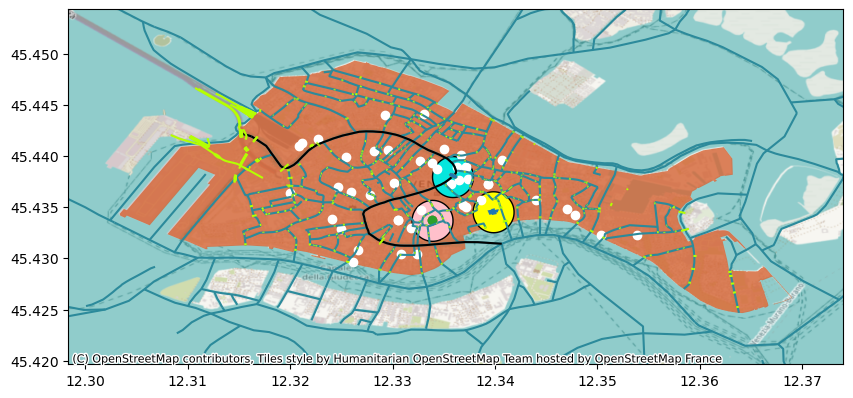

In [364]:
fig = plt.figure(figsize = (10,5))
ax = fig.subplots(1,1)


# Doge = building['geometry'][0].centroid.buffer(.002)
# Tea = Teatro['geometry'][0].centroid.buffer(.002)
# St = St_Mark['geometry'][0].centroid.buffer(.002)
# Ria = Rialto['geometry'][0].centroid.buffer(.002)
# San = Piazza['geometry'][0].centroid.buffer(.002)


import pandas as pd
import geopandas as gpd
# Assuming building is a GeoDataFrame
# Doge_gdf = gpd.GeoDataFrame(geometry=[Doge], crs="EPSG:4326")
# tea_gdf = gpd.GeoDataFrame(geometry=[Tea], crs="EPSG:4326")
# St_gdf = gpd.GeoDataFrame(geometry=[St], crs="EPSG:4326")
# Ria_gdf = gpd.GeoDataFrame(geometry=[Ria], crs="EPSG:4326")
# San_gdf = gpd.GeoDataFrame(geometry=[San], crs="EPSG:4326")
# # If you need to convert it to a regular DataFrame for some reason
x_min, y_min, x_max, y_max = Venezia['geometry'][0].bounds


canals.plot(ax=ax, color = '#2C8A9B')
Venezia.plot(ax=ax, color = '#D56333',alpha = 0.8)

Grande.plot(ax=ax, color = 'black')
bridge.plot(ax=ax, color = '#B5FF02')

# St_gdf.plot(ax=ax, edgecolor = 'black', color = 'yellow')
# Ria_gdf.plot(ax=ax, edgecolor = 'black', color = '#06E6DE')
# San_gdf.plot(ax=ax, edgecolor = 'black', color = 'pink')

# Teatro.plot(ax = ax)
# Piazza.plot(ax=ax)
# St_Mark.plot(ax=ax)
# Rialto.plot(ax=ax)
# Piazza.plot(ax=ax)
gelato.plot(ax=ax, color = 'white')

#__________________________________________________________________

ax.set_facecolor('#2C8A9B')
ax.set_xlim([x_min - 0.005, x_max + 0.005 ])
ax.set_ylim([y_min - 0.005 , y_max  + 0.005])


ctx.add_basemap(ax, crs=Venezia.crs)